In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# An E-Commerce company wants to find the factors influence the sales of the mobile Phone.


# Use your EDA techniques and statistical hypothesis techniques and find the factors which influences the sales of the mobile phones.


In [2]:
df=pd.read_csv(r"C:\STAT ASSIGNMENT\stat assignment.csv")

In [3]:
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
df.shape

(430, 16)

The table contains 430 rows and 16 columns.

# The provided dataset consists of the informations below:

1. Demographic information about the sales of mobiles with respect to ratings given by the customers and number of ratings count of customers.

2. The sales of mobile phone brand names and models are valuable assets that help correspond quality and suggest precise knowledge structures which related to the brand. The brand names includes Realme, Samsung, Xiaomi, Apple and Poco. The model of mobile phones are 119 is presented in the given dataset.

3. The mobile phone features is an attribute of a product to meet the satisfaction level of customer's needs and wants, through owning of the product, usage, and utilization of a mobile phones. Mobile phone features includes base_color, processor,	screen_size, ROM, RAM, display_size, num_rear_camera, num_front_camera and battery_capacity.

4. Price of mobile phones that is sales_price is the amount of money charged for a mobile or sum of values that customers exchange for benefits of having or using the mobile. Which is influenced by the discount_percent and number of sales of each mobile phones.



# Categorical data:

1. brand               
2. model               
3. base_color          
4. processor           
5. screen_size
    
# Numerical data:

1. ROM                 
2. RAM                 
3. display_size        
4. num_rear_camera     
5. num_front_camera    
6. battery_capacity    
7. ratings             
8. num_of_ratings      
9. sales_price         
10. discount_percent    
11. sales        

# Objective and introduction to problem statement:
    
The present study tries to explore the factors influence the sales of mobiles in E-commerce company.

The study also attempts to find out if there is any significant effect of product features, brand, and perceived price on sales of mobile phone brand and social influences(rating) has any significant impact on sales of mobile phones.


# Hypothesis generation with respect to problem statement:

1. To verify brand is influenced by the sales_price of mobile phones.

2. The company claims that the number of ratings of mobile phone impacts the sales.

3. To verify that the sales of mobile phone is influenced by brand or processor or both.

4. The company claims that the battery_capacity impact the sales.

5. The company claims that the RAM of mobile phones affects the sales.

6. The company claims that the ROM of mobile phones affects the sales.

7. To verify discount_percent affects the sales of mobile phones.

8. To verify base_color affects the sales of mobile phones.


# EDA techniques:

1. Drop duplicates
2. Extract important variables
3. Detect missing values,outliers and anomalies.
4. Test underlying assumptions
5. Statistical graphics and data visualization methods.


# Statistical hypothesis techniques:

Parametric test: Follows certain assumptions and results will be accurate.

1. t-test
2. z-test
3. Paired t-test
4. One way ANOVA
5. Two way ANOVA

Non-parametric test: No need to follow assumptions and results may not be accurate(test of median):

1. Wilcoxon 
2. Mann whitney
3. Kruskal-Wallis test
4. Friedman
5. Chi-square test of independence


# Performing EDA

In [5]:
df.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [8]:
df.columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

In the given data there are 16 columns.

In [9]:
df['sales']=df['sales'].astype('int')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ROM,430.0,105.748837,63.164064,8.00,64.00,128.00,128.00,512.00
RAM,430.0,5.320930,2.182635,1.00,4.00,4.00,6.00,12.00
display_size,430.0,6.369767,0.369549,4.70,6.30,6.50,6.50,7.60
num_rear_camera,430.0,2.904651,0.952350,1.00,2.00,3.00,4.00,4.00
num_front_camera,430.0,1.044186,0.227280,1.00,1.00,1.00,1.00,3.00
battery_capacity,430.0,4529.397674,986.907252,1800.00,4000.00,4500.00,5000.00,7000.00
ratings,430.0,4.339302,0.151494,3.00,4.30,4.30,4.40,4.60
num_of_ratings,430.0,23567.944186,56096.277784,4.00,745.00,5197.50,21089.25,642373.00
sales_price,430.0,25433.234884,22471.926588,5742.00,11999.00,16989.50,28999.00,157999.00
discount_percent,430.0,0.108000,0.073432,0.01,0.06,0.09,0.16,0.44


# INSIGHTS:

From the above table we can conclude that numerical data which highlights important features and patterns of mobile phone sales.

The average sales of mobile phone with respect to the features RAM and ROM where ROM has the highest average and also average speed of mobile phones RAM. Also the customers prefer to purchase mobile phones with ROM of 128GB and RAM of 4GB.

The sales of mobile phones with respect to battery_capacity and sales_price by the E-commerce company influences the sales which gives raise to claim.

There is highest variation in number of ratings given by the customers, this may affect the sales of mobile phone.

Also sales_price affects the sales of mobile phone with highest variation and sales is not normally distributed.


In [48]:
df.describe(include='object').T

,count,unique,top,freq
brand,430,5,Realme,138
model,430,119,iPhone XR,18
base_color,430,12,Blue,117
processor,430,7,Qualcomm,168
screen_size,430,5,Large,242


# INSIGHTS:

Form the above table we can conclude that the categorical data model of mobile phones has 119 models and iPhone XR is mostly prefered by the customers, also Realme brand mobile phone has been saled by the company atmost that highly saled brand and the customers prefer mobile phones with blue color as base color of mobile phone.

Customers tend to purchase Qualcomm as their mobile phone processor and also screen_size with large.

# The distribution of Sales

In [45]:
df.sales.value_counts()

0      77
1      40
4      25
5      23
23     15
       ..
41      1
78      1
26      1
158     1
493     1
Name: sales, Length: 80, dtype: int64

In [46]:
df.sales.value_counts(normalize=True)

0      0.179070
1      0.093023
4      0.058140
5      0.053488
23     0.034884
         ...   
41     0.002326
78     0.002326
26     0.002326
158    0.002326
493    0.002326
Name: sales, Length: 80, dtype: float64

<AxesSubplot:xlabel='sales', ylabel='Count'>

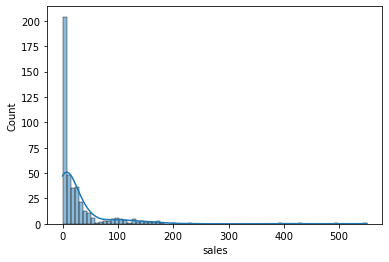

In [47]:
sns.histplot(x='sales',data=df,kde=True)

From the above plot we conclude that the sales distribution is not normal, it is positively skewed(right side) and most of the sales of mobile phone is between 0 to 200 has achieved peakness and then the sales has been dropped gradually.

# Summary table

In [35]:
pd.crosstab(df["brand"],df["processor"],margins=True,normalize=True)

processor,Ceramic,Exynos,MediaTek,Others,Qualcomm,Water,iOS,All
brand,,,,,,,,
Apple,0.076744,0.000000,0.000000,0.000000,0.000000,0.025581,0.027907,0.130233
Poco,0.000000,0.000000,0.053488,0.000000,0.076744,0.000000,0.000000,0.130233
Realme,0.000000,0.000000,0.211628,0.013953,0.095349,0.000000,0.000000,0.320930
Samsung,0.000000,0.123256,0.058140,0.006977,0.088372,0.000000,0.000000,0.276744
Xiaomi,0.000000,0.000000,0.011628,0.000000,0.130233,0.000000,0.000000,0.141860
All,0.076744,0.123256,0.334884,0.020930,0.390698,0.025581,0.027907,1.000000


From the above contigency table we can conclude that the 0.6977% of total population are Xiaomi brand with others processor and
21.628% of total population are Realme brand with Media Tek processor.

In [36]:
df[['discount_percent','sales']].corr()

,discount_percent,sales
discount_percent,1.000000,0.155067
sales,0.155067,1.000000


The correlation between discount_percent and sales is 0.155067 which is weak positive, sales of mobile phone giving raise to claim.

<AxesSubplot:>

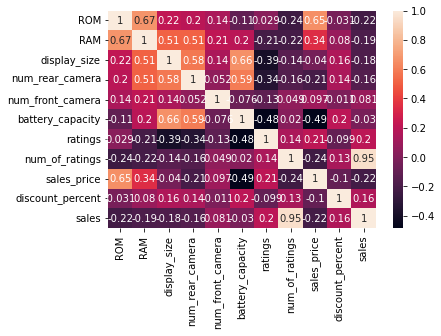

In [37]:
df1=df.select_dtypes(exclude='object')
sns.heatmap(df1.corr(),annot=True)

From the above heat map we conclude that the highest correlation is between number of ratings and sales. Also sales_price and battery_capacity has weak correlation(negative correlation) that is customer prefer mobile phones with higher battery capacity.

The average sales of mobile phones with respect to battery_capacity and sales_price by the E-commerce company influences the sales which gives raise to claim. 

In [75]:
df2=df.brand.value_counts()

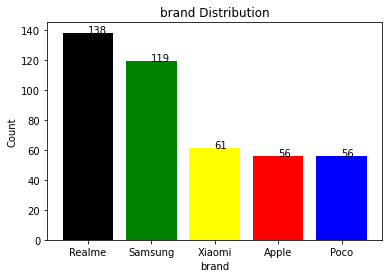

In [74]:
plt.bar(df2.index,df2,color=['black','g','yellow','r','b'])
plt.xlabel('brand')
plt.ylabel('Count')
plt.title('brand Distribution')
counts=[df2[0],df2[1],df2[2],df2[3],df2[4]]
for i,v in enumerate(counts):
    plt.annotate(str(v),(i,v))

 From the above plot we conclude that the Realme has the hightest count that is the customers prefers to buy Realme brand than the other brands Samsung, Xiaomi brand, Apple and Poco.

<AxesSubplot:xlabel='display_size', ylabel='count'>

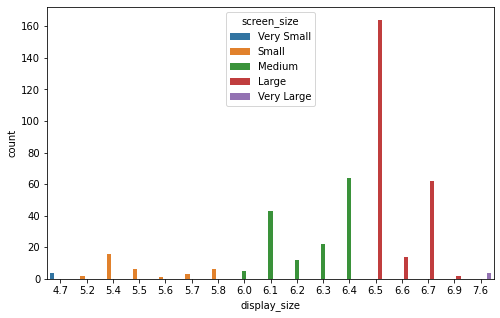

In [81]:
plt.figure(figsize=(8,5))
sns.countplot(x='display_size',data=df,hue='screen_size')

From the above plot we conclude that most of the sales of mobile phone with large screen of 6.5 inch of display is preferred by the customers. And customer do not prefer very small screen_size in Apple brand with display of 4.7 inches.

<AxesSubplot:xlabel='RAM', ylabel='count'>

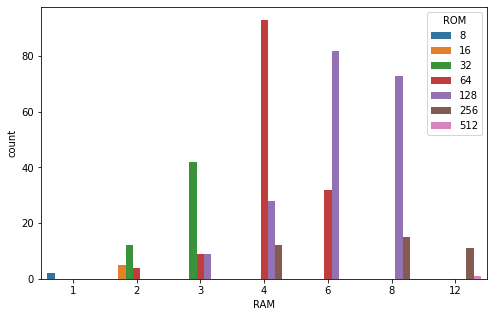

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(x='RAM',data=df,hue='ROM')

From the above plot we can conclude that customer prefer to purchase mobile phones with ROM of 128GB and RAM of 4GB.

<AxesSubplot:xlabel='num_rear_camera', ylabel='count'>

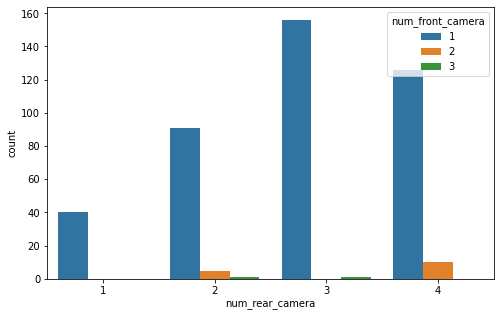

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x='num_rear_camera',data=df,hue='num_front_camera')

From the above plot we can conclude that customers prefer mobile phones with 3 number of rear cameras and mobile phones of 1 front camera.

<AxesSubplot:xlabel='ratings', ylabel='count'>

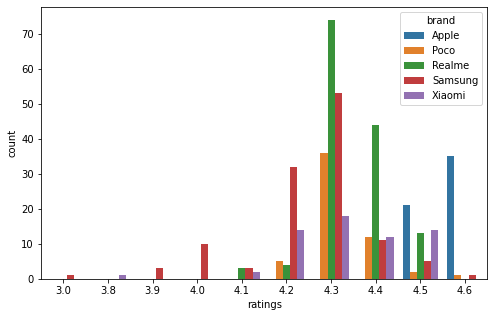

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(x='ratings',data=df,hue='brand')

From the above plot we can conclude that the customers have given 4.3 ratings to Realme brand of mobile phone and 3.0 rating to Samsung brand. Hence the E-commerce company can claim that customers prefer Realme brand atmost of the sales by giving 4.3 and also Apple brand mobile phone by giving the highest rating as 4.6.

<AxesSubplot:xlabel='battery_capacity', ylabel='Count'>

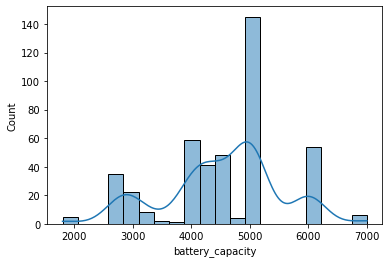

In [102]:
sns.histplot(x='battery_capacity',data=df,kde=True)

From the above plot we conclude that the customers prefer mobile phone sales with highest battery capacity in between 4000 to 5000 capability. And the distribution of battery capacity is approximately normal.

<AxesSubplot:xlabel='discount_percent', ylabel='Count'>

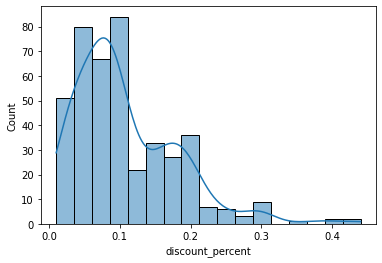

In [203]:
sns.histplot(x='discount_percent',data=df,kde=True)

From the above plot we conclude that the customers purchased the mobile phones at 0.1 percent of discount given by the E-commerce company and for the other discount percent the sales has been gradually dropped.

# 1. To verify brand is influenced by the sales_price of mobile phones @5% level of significance.

# Test the assumption:

1. Normality test
2. Variance test

In [15]:
R=df[df.brand=='Realme']['sales_price']
S=df[df.brand=='Samsung']['sales_price']
X=df[df.brand=='Xiaomi']['sales_price']
A=df[df.brand=='Apple']['sales_price']
P=df[df.brand=='Poco']['sales_price']

H0: The sales_price of mobile phone brand follows normal

H1: The sales_price of mobile phone brand do not follows normal

In [166]:
st.shapiro(R)       

ShapiroResult(statistic=0.6885092258453369, pvalue=9.88010464017346e-16)

Since p-value(9.88010464017346e-16) < alpha value(0.05),we reject H0, the sales_price of mobile phone brand do not follows normal. 

hence normality test fails we can proceed for non-parametric test

H0:The population variance for brand is equal to population variance of sales_price.
    
H1:The population variance for brand is not equal to population variance of sales_price.    
    

In [167]:
st.levene(R,S,X,A,P)

LeveneResult(statistic=8.79312886924167, pvalue=7.917601526069105e-07)

Since p-value(7.917601526069105e-07) is < alpha value(0.05), we reject Ho. The population variance for brand is not equal to population variance of sales_price.

variance equality test fails we can proceed for non-parametric test and the brand with respect to sales_price is not following normal we cannot proceed for ANOVA we can go for non-parametric test.

Therefore the test of assumptions fails we can proceed for non-parametric test.

# Kruskal wallis test:

H0: The population median sales_price for all the brand is same.

H1: The population median sales_price for atleast two brands will be different.



In [168]:
st.kruskal(R,S,X,A,P)

KruskalResult(statistic=79.50086652837908, pvalue=2.2219711239158913e-16)

# Inference:

Since pvalue (2.2219711239158913e-16)< alpha value (0.05)--- reject our H0.
 
 We conclude that the population median sales_price for atleast two brands will be different.
 
 Hence brand is influenced by the sales_price of mobile phone.
 

# 2. The company claims that the number of ratings of mobile phone impacts the sales verify at 5% level of significance.


In [208]:
df.groupby('num_of_ratings')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
num_of_ratings,,,,,,,,
4,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,6.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
10,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
226996,3.0,150.666667,6.350853,147.0,147.0,147.0,152.5,158.0
267028,1.0,427.000000,NaN,427.0,427.0,427.0,427.0,427.0
357064,1.0,392.000000,NaN,392.0,392.0,392.0,392.0,392.0


# Test the assumption:

1. Normality test
2. Variance test

In [169]:
Num_r=df['num_of_ratings']
Sales=df['sales']

H0: The number of ratings for sales follows normal

H1: The number of ratings for sales do not follow normal

In [170]:
st.shapiro(Num_r)

ShapiroResult(statistic=0.4306541681289673, pvalue=1.183964338632939e-34)

since p value < alpha value(0.05) -we reject H0.

The number of ratings for sales do not follow normal.

H0:The population variance for number of ratings is equal to population variance of sales.
    
H1:The population variance for number of ratings is not equal to population variance of sales.    
    

In [171]:
st.levene(Num_r,Sales)

LeveneResult(statistic=71.16070360564967, pvalue=1.3873449338146834e-16)

since p value < alpha value(0.05) -we reject H0.

The population variance for number of ratings is not equal to population variance of sales.

Therefore the test of assumptions fails we can proceed for non-parametric test.

# Mann Whitney-U test:

H0:The population median of number of ratings and sales is same
    
H1:The population median of number of ratings and sales is different

In [172]:
st.mannwhitneyu(Num_r,Sales)

MannwhitneyuResult(statistic=178360.5, pvalue=4.078995262030491e-123)

# Inference:

Since p-value < alpha value(0.05)-- we reject our Ho.

We conclude that the population median of number of ratings and sales is different.

Hence number of ratings of mobile phone impacts the company sales.

# 3. To verify that the sales of mobile phone is influenced by brand or processor or both @5% level of significance.

# Test the assumption:

1. Normality test
2. Variance test

In [173]:
R=df[df.brand=='Realme']['sales']
S=df[df.brand=='Samsung']['sales']
X=df[df.brand=='Xiaomi']['sales']
A=df[df.brand=='Apple']['sales']
P=df[df.brand=='Poco']['sales']

H0: The sales of mobile phone brand follows normal

H1: The sales of mobile phone brand do not follow normal

In [174]:
st.shapiro(R)

ShapiroResult(statistic=0.6885092258453369, pvalue=9.88010464017346e-16)

Since p-value(9.88010464017346e-16) < alpha value(0.05),we reject H0, the sales of mobile phone brand do not follows normal. 

hence normality test fails we can proceed for non-parametric test

H0:The population variance for brand is equal to population variance of sales.
    
H1:The population variance for brand is not equal to population variance of sales.    
    

In [175]:
st.levene(R,S,X,A,P)

LeveneResult(statistic=8.79312886924167, pvalue=7.917601526069105e-07)

Since p-value(7.917601526069105e-07) is < alpha value(0.05), we reject Ho.

The population variance for brand is not equal to population variance of sales.

In [176]:
q=df[df.processor=='Qualcomm']['sales']
m=df[df.processor=='MediaTek']['sales']
e=df[df.processor=='Exynos']['sales']
c=df[df.processor=='Ceramic']['sales']
i=df[df.processor=='iOS']['sales']
w=df[df.processor=='Water']['sales']
o=df[df.processor=='Others']['sales']

H0: The sales of mobile phone processor follows normal

H1: The sales of mobile phone processor do not follow normal

In [177]:
st.shapiro(q)

ShapiroResult(statistic=0.46470290422439575, pvalue=2.596572146463218e-22)

Since p-value(2.596572146463218e-22) < alpha value(0.05),we reject H0, the sales of mobile phone processor do not follows normal. 

hence normality test fails we can proceed for non-parametric test

H0:The population variance for processor is equal to population variance of sales.
    
H1:The population variance for processor is not equal to population variance of sales.    
    

In [178]:
st.levene(q,m,e,c,i,w,o)

LeveneResult(statistic=2.2013596478747597, pvalue=0.04197832182200595)

Since p-value(0.04197832182200595) < alpha value(0.05),we reject H0

The population variance for processor is not equal to population variance of sales.

Therefore the test of assumptions fails we can proceed for non-parametric test.

In [179]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

Brand or column

H0: The population mean sales is same for all the brands

H1: The population mean sales is different for atleast two brands
    

Processor or row:
    
H0: The population mean sales is same for all the processor
    
H1: The population mean sales is different for all the processor

In [180]:
model1=ols('df.sales~df.brand+df.processor',data=df).fit()
anova_table=anova_lm(model1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
df.brand,4.0,1.183761e+05,29594.017279,9.515294,2.261515e-07
df.processor,6.0,3.865224e+04,6442.040440,2.071294,5.548973e-02
Residual,420.0,1.306264e+06,3110.152763,NaN,NaN


# Inference:

since p value for brand < alpha value (0.05) -- reject H0 
hence we can conclude that the sales is impacted by brand.

since  p value for processor < alpha value (0.05) -- reject H0
hence we conclude that sales is impacted by processor.

 Hence the sales of mobile phones is influenced by both brand and processor.

# 4. The company claims that the battery_capacity impact the sales. Verify at 5% level of significance.

# Test the assumption:

1. Normality test
2. Variance test

In [181]:
battery=df['battery_capacity']
s=df['sales']

H0: The battery capacity of mobile phone sales follows normal

H1: The battery capacity of mobile phone sales do not follows normal

In [182]:
st.shapiro(battery)

ShapiroResult(statistic=0.9377903938293457, pvalue=2.0103974908425304e-12)

since p value < alpha value(0.05) -we reject H0.

The battery capacity of mobile phone sales do not follow normal.

H0:The population variance for battery capacity is equal to population variance of sales.
    
H1:The population variance for battery capacity is not equal to population variance of sales.    
    

In [183]:
st.levene(battery,s)

LeveneResult(statistic=606.130618706371, pvalue=1.1433184098452964e-101)

since p value < alpha value(0.05) -we reject H0.

The population variance for battery capacity is not equal to population variance of sales.

Therefore the test of assumptions fails we can proceed for non-parametric test.

# Mann Whitney-U test:

H0:The population median of battery_capacity and sales is same
    
H1:The population median of battery_capacity and sales is different

In [184]:
st.mannwhitneyu(battery,s)

MannwhitneyuResult(statistic=184900.0, pvalue=8.174656764103867e-143)

# Inference:

Since p-value < alpha value(0.05)-- we reject our Ho.

We conclude that the population median of battery_capacity and sales is different.

Hence battery capacity of mobile phone impacts the company sales.

# 5. The company claims that the RAM of mobile phones affects the sales. Verify at 5% level of significance.

# Test the assumption:

1. Normality test
2. Variance test

In [185]:
ram=df['RAM']
s=df['sales']

H0: The sales of RAM of mobile phone follows normal

H1: The sales of RAM of mobile phone do not follows normal

In [186]:
st.shapiro(ram)

ShapiroResult(statistic=0.8942855000495911, pvalue=1.1788262082567525e-16)

since p value < alpha value(0.05) -we reject H0.

The sales of RAM of mobile phone do not follows normal

H0:The population variance for RAM of mobile phone is equal to population variance of sales.
    
H1:The population variance for RAM of mobile phone is not equal to population variance of sales.    
    

In [187]:
st.levene(ram,s)

LeveneResult(statistic=88.29242444137071, pvalue=4.971760487354301e-20)

since p value < alpha value(0.05) -we reject H0.

The population variance for RAM of mobile phone is not equal to population variance of sales.

Therefore the test of assumptions fails we can proceed for non-parametric test.

# Mann Whitney-U test:

H0:The population median of RAM of mobile phone and sales is same
    
H1:The population median of RAM of mobile phone and sales is different

In [188]:
st.mannwhitneyu(ram,s)

MannwhitneyuResult(statistic=75567.5, pvalue=3.127559586436253e-06)

# Inference:

Since p-value < alpha value(0.05)-- we reject our Ho.

We conclude that the population median of RAM of mobile phone and sales is different.

Hence RAM of mobile phone affects the company sales.

# 6. The company claims that the ROM of mobile phones affects the sales. Verify at 5% level of significance.

# Test the assumption:

1. Normality test
2. Variance test

In [189]:
rom=df['ROM']
s=df['sales']

H0: The sales of ROM of mobile phone follows normal

H1: The sales of RAM of mobile phone do not follows normal

In [190]:
st.shapiro(rom)

ShapiroResult(statistic=0.792663037776947, pvalue=5.073076129054942e-23)

since p value < alpha value(0.05) -we reject H0.

The sales of ROM of mobile phone do not follows normal

H0:The population variance for ROM of mobile phone is equal to population variance of sales.
    
H1:The population variance for ROM of mobile phone is not equal to population variance of sales.    
    

In [191]:
st.levene(rom,s)

LeveneResult(statistic=30.797801237711575, pvalue=3.816826811067443e-08)

since p value < alpha value(0.05) -we reject H0.

The population variance for ROM of mobile phone is not equal to population variance of sales.

Therefore the test of assumptions fails we can proceed for non-parametric test.

# Mann Whitney-U test:

H0:The population median of ROM of mobile phone and sales is same
    
H1:The population median of ROM of mobile phone and sales is different

In [192]:
st.mannwhitneyu(rom,s)

MannwhitneyuResult(statistic=166099.5, pvalue=2.0787257509688317e-92)

# Inference:

Since p-value < alpha value(0.05)-- we reject our Ho.

We conclude that the population median of ROM of mobile phone and sales is different.

Hence ROM of mobile phone affects the company sales.

# 7. To verify discount_percent affects the sales of mobile phones @5% level of significance.

# Test the assumption:

1. Normality test
2. Variance test

In [204]:
dis=df['discount_percent']
s=df['sales']

H0: The sales of mobile phone with discount percent follows normal

H1: The sales of mobile phone with discount percent do not follows normal

In [205]:
st.shapiro(dis)

ShapiroResult(statistic=0.8992107510566711, pvalue=3.0219488580073266e-16)

since p value < alpha(0.05) -we reject H0.

The sales of mobile phone with discount percent do not follows normal

H0:The population variance for discount percent of mobile phone is equal to population variance of sales.
    
H1:The population variance for discount percent of mobile phone is not equal to population variance of sales.    
    

In [206]:
st.levene(dis,s)

LeveneResult(statistic=101.23565551328487, pvalue=1.3780762128656168e-22)

since p value < alpha(0.05) -we reject H0.

The population variance for discount percent of mobile phone is not equal to population variance of sales.

Therefore the test of assumptions fails we can proceed for non-parametric test.

# Mann Whitney-U test:

H0:The population median of discount percent of mobile phone and sales is same
    
H1:The population median of discount percent of mobile phone and sales is different

In [207]:
st.mannwhitneyu(dis,s)

MannwhitneyuResult(statistic=33110.0, pvalue=9.448804347084936e-60)

# Inference:

Since p-value < alpha value(0.05)-- we reject our Ho.

We conclude that The population median of discount percent of mobile phone and sales is different

Hence discount percent affects the sales of mobile phones.

# 8. To verify base_color affects the sales of mobile phones @5% level of significance.

In [197]:
df.groupby('base_color')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
base_color,,,,,,,,
Black,112.0,32.616071,71.320018,0.0,1.00,7.0,25.00,493.0
Blue,117.0,25.940171,39.029452,0.0,2.00,11.0,30.00,204.0
Bronze,5.0,6.000000,8.396428,0.0,0.00,1.0,10.00,19.0
Gold,11.0,99.000000,162.906108,0.0,2.50,31.0,134.50,550.0
Gray,20.0,20.450000,39.637137,0.0,0.00,5.0,17.75,167.0
Green,24.0,29.625000,43.057911,0.0,1.00,14.5,34.00,167.0
Others,28.0,22.500000,21.507105,0.0,3.00,20.0,33.50,79.0
Purple,5.0,2.800000,2.049390,1.0,1.00,2.0,5.00,5.0
Red,21.0,48.047619,97.577393,0.0,1.00,5.0,42.00,427.0


In [198]:
bk=df[df.base_color=='Black']['sales']
bu=df[df.base_color=='Blue']['sales']
br=df[df.base_color=='Bronze']['sales']
go=df[df.base_color=='Gold']['sales']
gr=df[df.base_color=='Grey']['sales']
grn=df[df.base_color=='Green']['sales']
o=df[df.base_color=='Others']['sales']
p=df[df.base_color=='Purple']['sales']
r=df[df.base_color=='Red']['sales']
s=df[df.base_color=='Silver']['sales']
w=df[df.base_color=='White']['sales']
y=df[df.base_color=='Yellow']['sales']

# Test the assumption:

1. Normality test
2. Variance test

H0: The sales of mobile phone with base color follows normal

H1: The sales of mobile phone with base color do not follows normal

In [199]:
st.shapiro(bk)

ShapiroResult(statistic=0.4880584478378296, pvalue=5.219019974286973e-18)

since p value < alpha(0.05) -we reject H0.

The sales of mobile phone with base color do not follows normal

H0:The population variance for base color of mobile phone is equal to population variance of sales.
    
H1:The population variance for base color of mobile phone is not equal to population variance of sales.    
    

In [200]:
st.levene(bk,bu,br,go)

LeveneResult(statistic=4.655051577193954, pvalue=0.0034976807548154454)

since p value < alpha(0.05) -we reject H0.

The population variance for base color of mobile phone is not equal to population variance of sales.

Therefore the test of assumptions fails we can proceed for non-parametric test.

# Kruskal wallis test:

In [201]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

H0: The population median base color for all the mobile phone sales is same.

H1: The population median base color for atleast two mobile phone sales will be different.


In [202]:
model=ols('sales~base_color',data=df).fit()
anova_table_df=anova_lm(model)
anova_table_df

,df,sum_sq,mean_sq,F,PR(>F)
base_color,11.0,7.619269e+04,6926.607989,2.090669,0.019946
Residual,418.0,1.384878e+06,3313.105893,NaN,NaN


# Inference:

since p value < alpha value(0.05)-- reject H0

We conclude that the population median base color for atleast two mobile phone sales is different

Hence base color affects the sales of mobile phone.

# OVERALL INFERENCE:

From the above statistical hypothesis testing we conclude that there are many factors that influenced the sales of mobile phone in E-commerce company:

1) Brand

2) Num_of rating

3) Processor

4) Battery capacity

5) RAM

6) ROM

7) Discount percent

8) base color

This proved that there is a significant effect of product features, brand, and perceived price on sales of mobile phone brand and social influences(rating) has an significant impact on sales of mobile phones.

Therefore number of ratings given by the customers affects most of the sales of mobile phones and also battery capacity affects the sales of the E-commerce company.  